# Data exploration and Preprocessing

This notebook covers basic techniques of data exploration and preprocessing. The main goal is feature-selection: identifying which features are useful for prediction and which are more likely to just add noise.

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

## 1. Variable identification

The first step is to become familiar with the dataset by understand what each variable means (i.e. actually understanding the significance of the variable for the domain that is being modeled). This boils down to just reading the variable/column name and looking at a few example values.

Also identify which variables are **predictors** and which is the **target** variable.

Also determine the type of each variable: **continuous** or **categorical**.

## 2. Univariate analysis

Next, look at variables one by one and determine their key characteristics. Special attention should be given to the target variable and variables we believe to be important to the domain.

### 2.a Continuous variables

For continuous variables, we're mainly interested in the central tendency of the variable and its spread.

In [10]:
df = pd.DataFrame({'var':np.random.random_sample((50,))})
df['var'].describe()

count    50.000000
mean      0.494784
std       0.297334
min       0.034758
25%       0.253978
50%       0.472976
75%       0.774275
max       0.988494
Name: var, dtype: float64

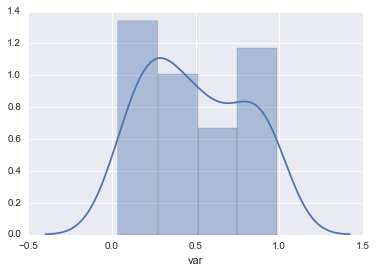

In [11]:
sns.distplot(df['var'])

In [12]:
print("Skewness: %f" % df['var'].skew())
print("Kurtosis: %f" % df['var'].kurt())

Skewness: 0.182821
Kurtosis: -1.276913


### 2.b Categorical variables

For categorical variables, we're mainly interested in number of values of each category. For the target variable it is particularly important to check whether there is an imbalance, as some classification algorithms are more robust than others in handling class imbalance.

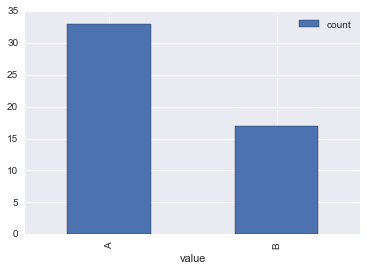

In [14]:
df = pd.DataFrame({'value':['A','B'], 
                   'count':np.random.multinomial(50, [0.7, 0.3])})
df.plot(x='value', y='count', kind='bar')

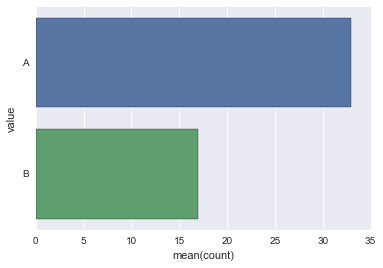

In [16]:
sns.barplot(x='count', y='value', data=df)

## 3. Bivariate analysis

The goal of bivariate analysis is to find out the relationship between two variables. This can be done for any combination of continuous and categorical values. The relationship between different predictors and the target variable is of particular interest.

### 3.a Relationship between two continuous variables

The main measure here is the pairwise correlation between two variables.

Predictior variables that correlate strongly with the target variable are likely going to be good predictors.

On the other hand, if a pair of predictor variables correlate strongly, it means one of them can probably be dropped.

In [28]:
df = pd.DataFrame({'var1': np.random.normal(10, 3, size=1000), 
                   'var2': np.random.normal(10, 3, size=1000)})
df.corr()

,var1,var2
var1,1.000000,-0.021759
var2,-0.021759,1.000000


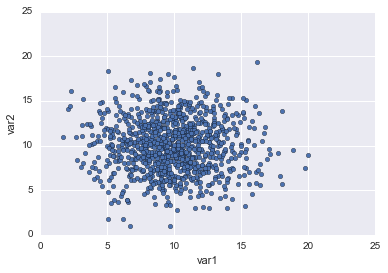

In [30]:
df.plot.scatter(x='var1', y='var2')

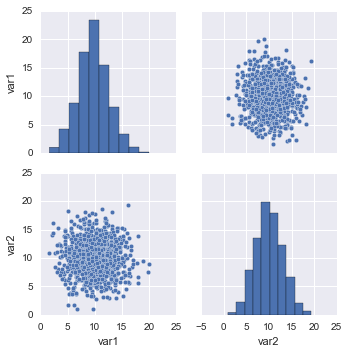

In [37]:
sns.pairplot(df, size = 2.5)

The **heatmap** is a nice visualization of pairwise correlations for a larger set of variables. It shows at a glance which variable provide the same information (they correlate strongly) and which are likely to be good predictors (they correlate strongly with the target variable).

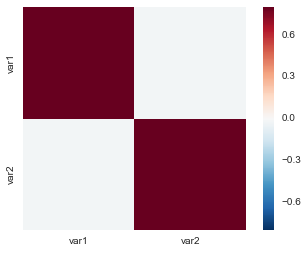

In [31]:
sns.heatmap(df.corr(), vmax=.8, square=True)

An extension to this is the **zoomed heatmap**, where we choose the k variables that correlate strongest with the target variable and draw the heatmap focusing only on those.

### 3.b Relationship between two categorical variables

To describe the relationship between two categorical variables we can use the two-way table or cross-tabulation.

In [35]:
a = np.array(['one', 'one', 'one', 'two', 'one', 'one',
       'one', 'two', 'two', 'two', 'one'])
b = np.array(['foo', 'bar', 'bar', 'bar', 'foo', 'bar',
       'bar', 'foo', 'bar', 'foo', 'foo'])
pd.crosstab(a, b)

col_0,bar,foo
row_0,,
one,4,3
two,2,2


The visualization of this is the stacked chart.

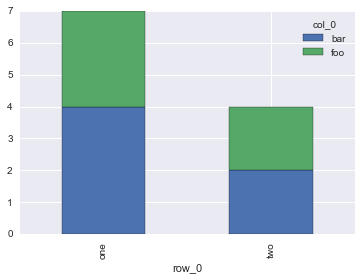

In [40]:
df = pd.DataFrame(pd.crosstab(a,b))
df.plot.bar(stacked=True);

### 3.c Relationship between a categorical variable and a continuous one

This is best visualized by means of box plots.

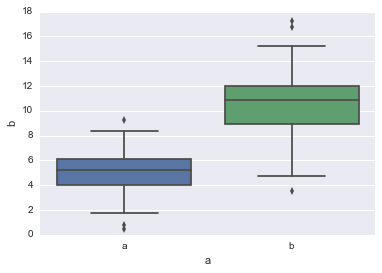

In [50]:
df = pd.DataFrame({'a': np.concatenate([np.repeat('a', 50), np.repeat('b', 50)]),
                   'b': np.concatenate([np.random.normal(5,2,size=50), np.random.normal(10,3,size=50)])})
sns.boxplot(x='a', y='b', data=df)

## 4. Missing data

Main questions when it comes to missing data:
* How many missing values are there for a given variable? 
* What is the cause of the missing data? Are values missing randomly? Or is the variable unobserved for some types of observations? Or is the fact that the variable has missing values related to the values themselves?

How to handle missing data:
* Dropping the variable. This is a good strategy in case the number of missing values is high (e.g. above 20%). The importance of the variable should also be taken into account when considering to drop a variable. Also, if a variable with a lot of missing values correlates with another variable, it can probably be dropped.
* Dropping the observations. This is a good strategy when one important variable has very few missing values. It should also only be used if the values are missing at random. Then we can consider just dropping those rows from the dataset.
* Mean/Median/Mode/Prediction model imputation: the value can be calculated globally (based on all non-missing values) or per values of other variables. 

## 5. Outliers

We should look to remove outliers in both the target variable value, as well as predictor variable, based on both univariate analysis and how they relate to the target variable.

Outliers can be detected by visually inspecting plots or by measuring how far they deviate from the mean of the univariate/bivariate distribution.

Depending on the (likely) cause of outliers, we may choose to drop those observations (e.g. in case of measurement error) or we may have to consider them in the predictive model (for natural outliers).If outliers should not be dropped, there are several options for handling them: binning, imputing, treating them separately.

## 6. Feature Engineering

Feature engineering is the process of making the data more useful by transforming variables or making new ones.
* **Variable transformation** means applying a function to the values of a variable (e.g. log,  normalizing to scale or binning). *log* in particular is useful for eliminating positive skewness in a distribution. Many techniques work better with symmetric distributions.
* **Variable creation** is the process of deriving new variables based on applying a function on other variables or groups of variables (e.g. date -> day_of_week). Creation of dummy variables also falls in this category.

## References
* https://www.kaggle.com/pmarcelino/house-prices-advanced-regression-techniques/comprehensive-data-exploration-with-python
* https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/